In [4]:
pip list

Package                       Version
----------------------------- --------------
about-time                    3.1.1
agate                         1.7.1
alive-progress                2.3.1
annotated-types               0.7.0
anyio                         4.9.0
argon2-cffi                   23.1.0
argon2-cffi-bindings          21.2.0
arrow                         1.3.0
asn1crypto                    1.5.1
asttokens                     3.0.0
async-lru                     2.0.5
attrs                         25.3.0
azure-core                    1.34.0
azure-identity                1.23.0
azure-storage-blob            12.25.1
babel                         2.17.0
backoff                       2.2.1
beautifulsoup4                4.13.4
bleach                        6.2.0
boto3                         1.38.25
botocore                      1.38.25
cachetools                    5.5.2
certifi                       2025.1.31
cffi                          1.17.1
charset-normalizer            3.4.2

In [9]:
code = '''
import pandas as pd

def model(dbt, session):
    dbt.config(materialized="table", packages=["pandas"])

    sales_df = dbt.ref("sales_data").to_df()

    result = (
        sales_df
        .groupby("customer", as_index=False)["amount"]
        .sum()
        .rename(columns={"amount": "total_amount"})
    )

    return result



'''

# Save this as a dbt Python model
with open("models/total_sales.py", "w") as f:
    f.write(code)

In [10]:
!dbt run --select total_sales

04:13:21  Running with dbt=1.9.6
04:13:22  Registered adapter: duckdb=1.9.3
04:13:24  Found 3 models, 1 seed, 4 data tests, 428 macros
04:13:24  
04:13:24  Concurrency: 1 threads (target='dev')
04:13:24  
04:13:28  1 of 1 START python table model main.total_sales ............................... [RUN]
04:13:32  1 of 1 OK created python table model main.total_sales .......................... [OK in 3.61s]
04:13:32  
04:13:32  Finished running 1 table model in 0 hours 0 minutes and 7.39 seconds (7.39s).
04:13:32  
04:13:32  Completed successfully
04:13:32  
04:13:32  Done. PASS=1 WARN=0 ERROR=0 SKIP=0 TOTAL=1


In [1]:
import duckdb

conn = duckdb.connect("my_duckdb.duckdb")
df = conn.execute("SELECT * FROM total_sales").df()
df

,customer,total_amount
0,Alice,220
1,Bob,380
2,Charlie,320


In [2]:
df = df[df["total_amount"] > 200]  # Filter top customers
df = df.sort_values(by="total_amount", ascending=False)


In [4]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------------- ------- 6.6/8.1 MB 36.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 27.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 12.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 51.4 MB/s eta 0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- -------------

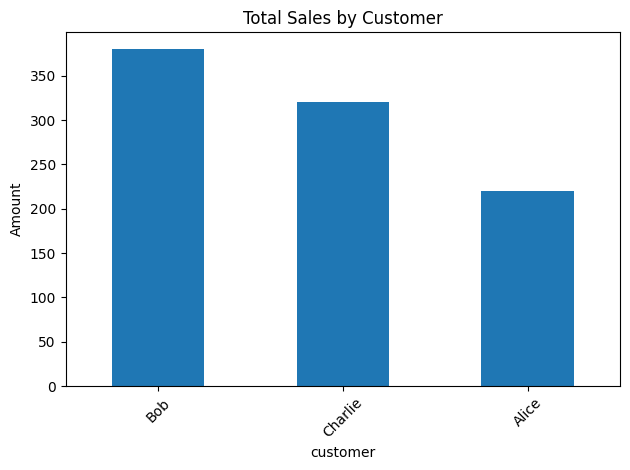

In [5]:
import matplotlib.pyplot as plt

df.plot(kind="bar", x="customer", y="total_amount", legend=False)
plt.title("Total Sales by Customer")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
test_sql = """
-- Fail if any total_amount is less than or equal to 0
SELECT *
FROM {{ ref('total_sales') }}
WHERE total_amount <= 0
"""

with open("tests/test_total_sales_positive.sql", "w") as f:
    f.write(test_sql)


In [9]:
conn.close()


In [10]:
!dbt test --select total_sales

04:23:11  Running with dbt=1.9.6
04:23:11  Registered adapter: duckdb=1.9.3
04:23:12  Found 3 models, 1 seed, 5 data tests, 428 macros
04:23:12  
04:23:12  Concurrency: 1 threads (target='dev')
04:23:12  
04:23:12  1 of 1 START test test_total_sales_positive .................................... [RUN]
04:23:12  1 of 1 PASS test_total_sales_positive .......................................... [PASS in 0.07s]
04:23:12  
04:23:12  Finished running 1 test in 0 hours 0 minutes and 0.22 seconds (0.22s).
04:23:12  
04:23:12  Completed successfully
04:23:12  
04:23:12  Done. PASS=1 WARN=0 ERROR=0 SKIP=0 TOTAL=1
